<a href="https://colab.research.google.com/github/mgje/PIUMP/blob/master/coLab-notebooks/Spielerei_mit_Schweizer_Lotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lottozahlen visualisieren

- 6 aus 42
- 6 Zahlen auf dem Lottoschein visualisieren
- letzte gezogene Schweizer Zahlen
- Wieviel 3er, 4er, 5er ?

In [1]:
# import Bibliotheken
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon, Arrow, ArrowStyle, RegularPolygon,Rectangle
import matplotlib.lines as lines
from matplotlib.collections import PatchCollection
from matplotlib import animation,rc
from IPython.display import HTML
from IPython.display import clear_output
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import time
from base64 import b64encode
plt.style.use('seaborn-white')

#%matplotlib --list
#plt.style.available


# 6 aus 42 ziehen

In [2]:
# Schweizer Lotto 6 aus 42

def lotto():
  arr = np.arange(1,43) # upper boundary <43
  np.random.shuffle(arr)
  return np.sort(arr[0:6])


# zufälligen Lottoschein visualisieren

[ 3  6 15 18 22 37]


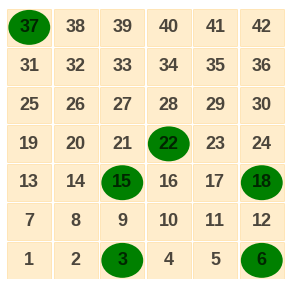

In [3]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(( 0, 6))
ax.set_ylim(( 0, 7))

ax.set_axis_off()

lot = lotto()


squares = []
i = 1
for y in range(7):
  for x in range(6):
    squares.append([Rectangle((x,y),width=0.95,height=0.95),i])
    i = i + 1

for s in squares:
  s[0].set_alpha(.2)
  s[0].set_color("orange")

  rx, ry = s[0].get_xy()
  cx = rx + s[0].get_width()/2.0
  cy = ry + s[0].get_height()/2.0
  ax.add_patch(s[0])

  ax.annotate(s[1], (cx, cy), color='w', weight='bold', 
                fontsize=18, c='black', ha='center', va='center', alpha= 0.7)
  
  if s[1] in lot:
    ax.add_patch(Circle((cx,cy),0.45,fc='green'))

print (lot)




# Aktuelle Lottozahlen

In [4]:
import requests
import bs4

def get_act_swiss_lotto():
  url = 'https://www.swisslos.ch/en/swisslotto/information/winning-numbers/winning-numbers.html'
  req = requests.get(url)
  web_page = bs4.BeautifulSoup(req.text, "lxml")
  tags_elements = web_page.find(name="div", attrs={"class": "actual-numbers___body"})
  numbersE = tags_elements.find_all(name="span", attrs={"class": "transform__center"})
  l = []
  for i in range(6):
    l.append(int(numbersE[i].text.strip("\n "))) # nur Zahlen ohne Zusatzzahl und ohne Replay
  return l


get_act_swiss_lotto()

[10, 20, 27, 34, 35, 38]

[10, 20, 27, 34, 35, 38]


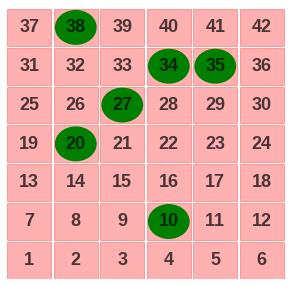

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(( 0, 6))
ax.set_ylim(( 0, 7))

ax.set_axis_off()

lot = get_act_swiss_lotto() # get actuall numbers


squares = []
i = 1
for y in range(7):
  for x in range(6):
    squares.append([Rectangle((x,y),width=0.95,height=0.95),i])
    i = i + 1

for s in squares:
  s[0].set_alpha(.3)
  s[0].set_color("red")

  rx, ry = s[0].get_xy()
  cx = rx + s[0].get_width()/2.0
  cy = ry + s[0].get_height()/2.0
  ax.add_patch(s[0])

  ax.annotate(s[1], (cx, cy), color='w', weight='bold', 
                fontsize=18, c='black', ha='center', va='center', alpha= 0.7)
  
  if s[1] in lot:
    ax.add_patch(Circle((cx,cy),0.45,fc='green'))

print (lot)

#Wieviele 3er, 4er, 5er und 6er, bei 100'000 Versuchen?


In [6]:
akt_lotto = get_act_swiss_lotto()
#print(akt_lotto)

def vergleich (l1,l2):
  z = 0
  for e in l1:
    if e in l2:
      z = z + 1
  return z

verteilung = np.zeros(7)
for i in range(100000):
  nl = lotto();
  z = vergleich(nl,akt_lotto)
  verteilung[z] += 1

print(f'''
Die aktuellen Lottozahlen sind: {akt_lotto}
Bei den 100'000 Versuchen gab es:
  {verteilung[3]:.0f}  \t3er
  {verteilung[4]:.0f}  \t\t4er
  {verteilung[5]:.0f}  \t\t5er
  {verteilung[6]:.0f}  \t\t6er
''')
  



Die aktuellen Lottozahlen sind: [10, 20, 27, 34, 35, 38]
Bei den 100'000 Versuchen gab es:
  2706  	3er
  200  		4er
  5  		5er
  0  		6er

